#### Project Aretim-po (Heart Disease Prediction)
This repository designed a project to predict heart disease risk comparing 3 ML models, featuring data preprocessing, model training, evaluation, and deployment-ready insights.

#### Data importation

In [42]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

In [37]:
# 3. To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer

# 4. import Iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 5. Machine Learning
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score

# 6. For Classification task.
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
# from xgboost import XGBClassifier

# 7. Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 8. Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('./Data/heart_disease_uci.csv')


#### Data exploration

In [4]:
train_df.head(3)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1


In [5]:
train_df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Data Preparation and Features importance


In [7]:
train_df.shape

(920, 16)

In [8]:
train_df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [9]:
train_df['age'].describe()


count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [10]:
custom_colors = ["#226D68", "#ECF8F6", "#FEEAA1"]  
sns.histplot(train_df['age'], kde=True, color="#18534F", palette=custom_colors)

C:\Users\narim\AppData\Local\Temp\ipykernel_2204\1441209479.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(train_df['age'], kde=True, color="#18534F", palette=custom_colors)


<Axes: xlabel='age', ylabel='Count'>

The distribution of the values in the "Age" column appears to follow a normal distribution.

In [11]:
train_df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [12]:
# Find the values count of age column grouping by sex column
train_df.groupby('sex')['age'].value_counts()

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [13]:
train_df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

In [14]:
# plot the countplot of dataset column
import plotly.io as pio
#pio.renderers.default = 'notebook'
pio.renderers.default = 'browser'

fig =px.bar(train_df, x='dataset', color='sex')

fig.show()

# print the values of dataset column groupes by sex
#print (train_df.groupby('sex')['dataset'].value_counts())

 plot the histogram of age column using plotly and coloring this by sex

In [15]:
fig = px.histogram(data_frame=train_df, x='age', color= 'sex')
fig.show()

In [16]:
# make a plot of age column using plotly and coloring by dataset

fig = px.histogram(data_frame=train_df, x='age', color= 'dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print("___________________________________________________________")
print ("Mean of the dataset: ",train_df.groupby('dataset')['age'].mean())
print("___________________________________________________________")
print ("Median of the dataset: ",train_df.groupby('dataset')['age'].median())
print("___________________________________________________________")
print ("Mode of the dataset: ",train_df.groupby('dataset')['age'].agg(pd.Series.mode))
print("___________________________________________________________")

___________________________________________________________
Mean of the dataset:  dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
___________________________________________________________
Median of the dataset:  dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
___________________________________________________________
Mode of the dataset:  dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
___________________________________________________________


Exploring CP (Chest Pain) column

In [17]:
# value count of cp column
train_df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

In [18]:
sns.countplot(train_df, x='cp', hue= 'sex')

<Axes: xlabel='age', ylabel='Count'>

In [19]:
# count plot of cp column by dataset column
sns.countplot(train_df,x='cp',hue='dataset')

<Axes: xlabel='age', ylabel='Count'>

In [20]:
# Draw the plot of age column group by cp column

fig = px.histogram(data_frame=train_df, x='age', color='cp')
fig.show()

Let's explore the trestbps (resting blood pressure) column:
The normal resting blood pressure is 120/80 mm Hg

In [21]:
# lets summerize the trestbps column
train_df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

##### Handling missing values in trestbps column

There are some missing values becuase total values is 920 but here we have 861

In [22]:
# Dealing with Missing values in trestbps column.
# find the percentage of misssing values in trestbps column
print(f"Percentage of missing values in trestbps column: {train_df['trestbps'].isnull().sum() /len(train_df) *100:.2f}%")

Percentage of missing values in trestbps column: 6.41%


Removing missing values using Iterative imputer

In [23]:
# Impute the missing values of trestbps column using iterative imputer
# create an object of iteratvie imputer
imputer1 = IterativeImputer(max_iter=10, random_state=42)

# Fit the imputer on trestbps column
imputer1.fit(train_df[['trestbps']])

# Transform the data
train_df['trestbps'] = imputer1.transform(train_df[['trestbps']])

# Check the missing values in trestbps column
print(f"Missing values in trestbps column: {train_df['trestbps'].isnull().sum()}")

Missing values in trestbps column: 0


In [24]:
# let's see which columns has missing values
(train_df.isnull().sum()/ len(train_df)* 100).sort_values(ascending=False)

ca          66.413043
thal        52.826087
slope       33.586957
fbs          9.782609
oldpeak      6.739130
thalch       5.978261
exang        5.978261
chol         3.260870
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
num          0.000000
dtype: float64

In [25]:
# create an object of iterative imputer 
imputer2 = IterativeImputer(max_iter=10, random_state=42)

# fit transform on ca,oldpeak, thal,chol and thalch columns
train_df['ca'] = imputer2.fit_transform(train_df[['ca']])
train_df['oldpeak']= imputer2.fit_transform(train_df[['oldpeak']])
train_df['chol'] = imputer2.fit_transform(train_df[['chol']])
train_df['thalch'] = imputer2.fit_transform(train_df[['thalch']])
# let's check again for missing values
(train_df.isnull().sum()/ len(train_df)* 100).sort_values(ascending=False)

thal        52.826087
slope       33.586957
fbs          9.782609
exang        5.978261
restecg      0.217391
id           0.000000
age          0.000000
sex          0.000000
dataset      0.000000
cp           0.000000
trestbps     0.000000
chol         0.000000
thalch       0.000000
oldpeak      0.000000
ca           0.000000
num          0.000000
dtype: float64

#### All the coloumns are imputed which has floating data types and now lets impute the columns which has object data type.

In [26]:
print(f"The missing values in thal column are: {train_df['thal'].isnull().sum()}")

The missing values in thal column are: 486


In [27]:
train_df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [28]:
train_df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.000000,333.0,True,st-t abnormality,154.000000,False,0.000000,NaN,0.676375,NaN,1
916,917,62,Male,VA Long Beach,typical angina,132.132404,139.0,False,st-t abnormality,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.000000,223.0,True,st-t abnormality,100.000000,False,0.000000,NaN,0.676375,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,132.132404,385.0,True,lv hypertrophy,137.545665,NaN,0.878788,NaN,0.676375,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.000000,254.0,False,lv hypertrophy,93.000000,True,0.000000,NaN,0.676375,NaN,1


In [30]:
# find missing values.
train_df.isnull().sum()[train_df.isnull().sum()>0].sort_values(ascending=False)

thal       486
slope      309
fbs         90
exang       55
restecg      2
dtype: int64

In [32]:
missing_data_cols = train_df.isnull().sum()[train_df.isnull().sum()>0].index.tolist()

missing_data_cols

['fbs', 'restecg', 'exang', 'slope', 'thal']

In [33]:
# find categorical Columns
cat_cols = train_df.select_dtypes(include='object').columns.tolist()
cat_cols

# find Numerical Columns
Num_cols = train_df.select_dtypes(exclude='object').columns.tolist()
Num_cols

print(f'categorical Columns: {cat_cols}')
print(f'numerical Columns: {Num_cols}')

categorical Columns: ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical Columns: ['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']


In [34]:
# FInd columns 
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

##### Dealing missing Values with Machine learning model

In [38]:
passed_col = categorical_cols
def impute_categorical_missing_data(passed_col):
    
    df_null = train_df[train_df[passed_col].isnull()]
    df_not_null = train_df[train_df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = train_df[train_df[passed_col].isnull()]
    df_not_null = train_df[train_df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [39]:
train_df.isnull().sum().sort_values(ascending=False)

thal        486
slope       309
fbs          90
exang        55
restecg       2
id            0
age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
thalch        0
oldpeak       0
ca            0
num           0
dtype: int64

Use the Fonction to deal with missing value

In [40]:
# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((train_df[col].isnull().sum() / len(train_df)) * 100, 2))+"%")
    if col in categorical_cols:
        train_df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        train_df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 77.11 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.59 accuracy

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.61 accuracy

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.04 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 73.56 accuracy



In [41]:
train_df.isnull().sum().sort_values(ascending=False)

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

Now, all columns are complete without any missing data.

##### Dealing with outliers

_________________________________________________________________________________________________________________________________________________


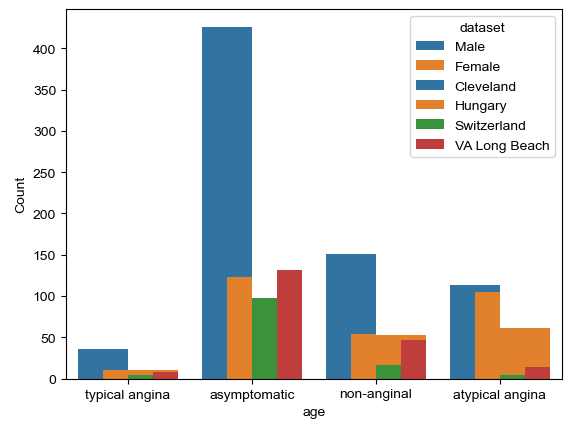

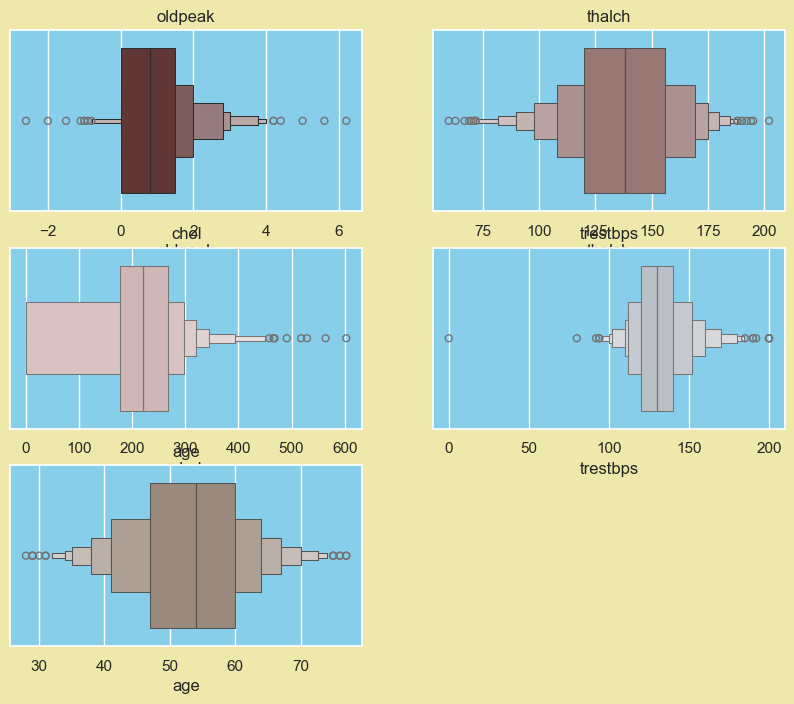

In [43]:
print("_________________________________________________________________________________________________________________________________________________")

sns.set(rc={"axes.facecolor":"#87CEEB","figure.facecolor":"#EEE8AA"})  # Change figure background color

palette = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

plt.figure(figsize=(10,8))

for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=train_df[col], color=palette[i % len(palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

In [44]:
# print the row from train_df where trestbps value is 0
train_df[train_df['trestbps']==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,754,55,Male,VA Long Beach,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,0.676375,reversable defect,3


In [50]:
# Remove the column because it is an outlier because trestbps cannot be zero.
train_df=train_df[train_df['trestbps']!=0]

confirm

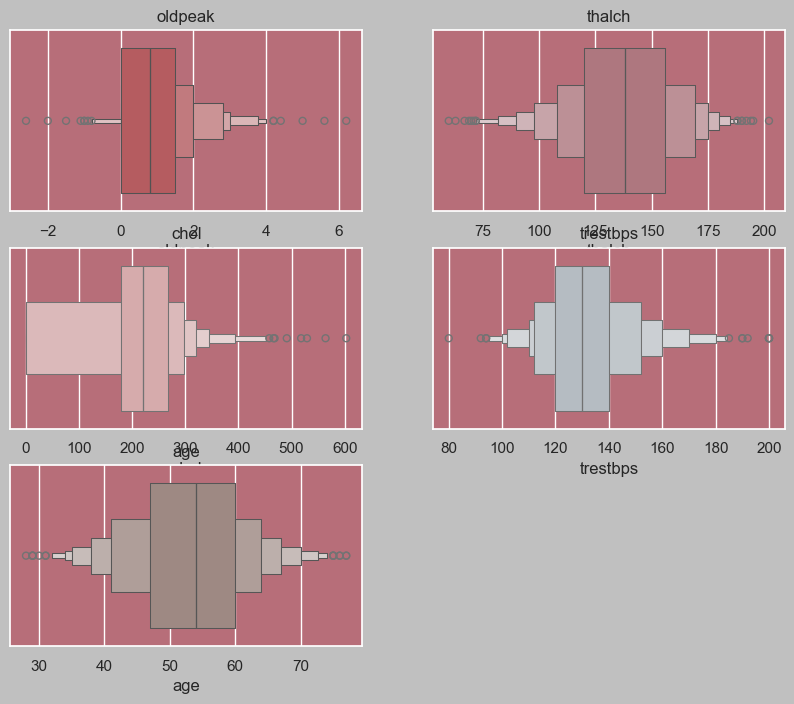

In [51]:
sns.set(rc={"axes.facecolor":"#B76E79","figure.facecolor":"#C0C0C0"})
modified_palette = ["#C44D53", "#B76E79", "#DDA4A5", "#B3BCC4", "#A2867E", "#F3AB60"]
cmap = ListedColormap(modified_palette)

plt.figure(figsize=(10,8))



for i, col in enumerate(numerical_cols):
    plt.subplot(3,2, i+1)
    sns.boxenplot(x=train_df[col], color=modified_palette[i % len(modified_palette)])  # Use modulo to cycle through colors
    plt.title(col)
    
plt.show()

In [52]:
train_df.trestbps.describe()

count    919.000000
mean     132.276183
std       17.930662
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

##### Handling Oldpeak Outliers

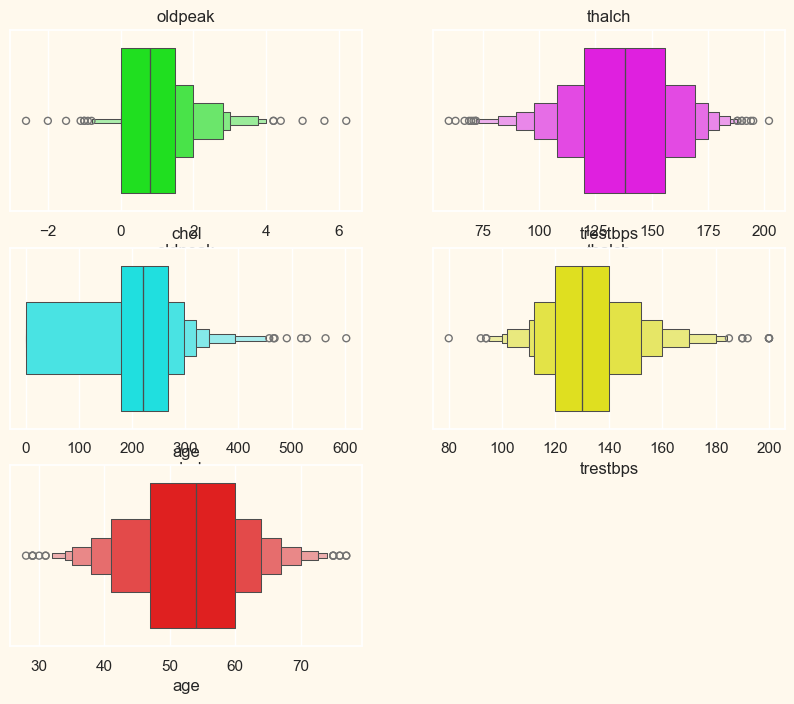

In [53]:
# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=train_df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()

let's remove -2 

In [60]:
train_df=train_df[train_df['oldpeak'] >=-1]

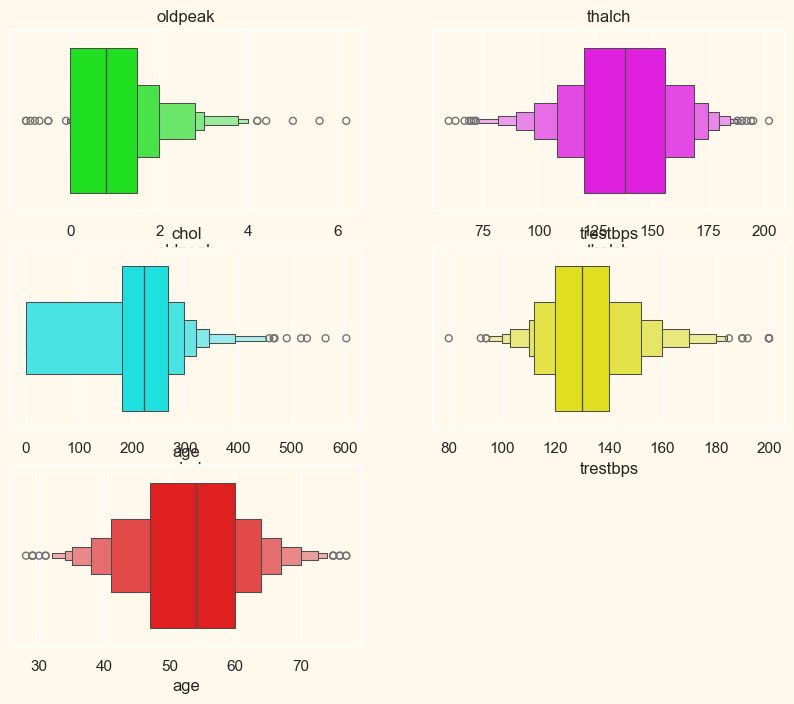

In [61]:
# Set facecolors
sns.set(rc={"axes.facecolor": "#FFF9ED", "figure.facecolor": "#FFF9ED"})

# Define the "night vision" color palette
night_vision_palette = ["#00FF00", "#FF00FF", "#00FFFF", "#FFFF00", "#FF0000", "#0000FF"]

# Use the "night vision" palette for the plots
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxenplot(x=train_df[col], color=night_vision_palette[i % len(night_vision_palette)])  # Use modulo to cycle through colors
    plt.title(col)

plt.show()

##### Handling Outliers in Age Column
Minimum age is 31 to have chest pain which can be possible so its not an outlier.
max age is 77 which is also possible so its not an outlier as well.

In [62]:
train_df.age.describe()

count    915.000000
mean      53.544262
std        9.424986
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

##### Handling trestbps column outliers

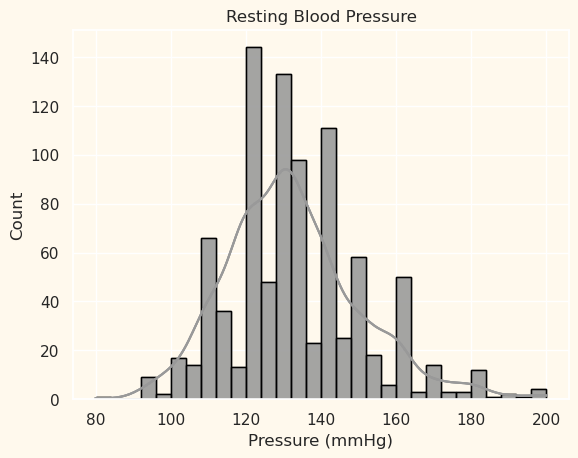

In [65]:
palette = ["#999999", "#666666", "#333333"]

sns.histplot(data=train_df, 
             x='trestbps', 
             kde=True,
             color=palette[0])

plt.title('Resting Blood Pressure')
plt.xlabel('Pressure (mmHg)')
plt.ylabel('Count')

plt.style.use('default')
plt.rcParams['figure.facecolor'] = palette[1]
plt.rcParams['axes.facecolor'] = palette[2] 
plt.show()

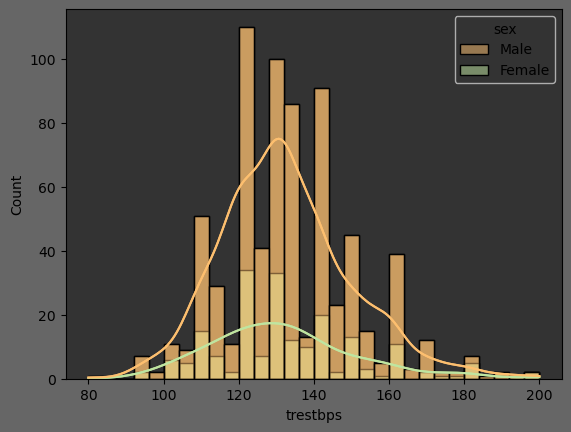

In [67]:
# create a histplot trestbops column to analyse with sex column
sns.histplot(train_df, x='trestbps', kde=True, palette = "Spectral", hue ='sex') 
plt.show()

Every things seems OK 

#### Prepare Training data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Prepare Training data
feature_cols = [
    '', ''
]



X = train_df[feature_cols]
y = train_df['']



#### Split training and validation sets

In [19]:
x_full_train, x_test,y_full_train, y_test= train_test_split(X, y, test_size=0.2, random_state=11)
x_train, x_val, y_train, y_val= train_test_split(x_full_train,y_full_train, test_size=0.25, random_state=11)

In [21]:
x_train.head()

,hour_sin,hour_cos,distance_x,distance_y,intensity,size,distance,is_peak_cyclone_season,cyclone_season_weight,peak_cyclone_daytime_interaction,...,distance_30,distance_60,intensity_density_30,intensity_density_60,minute_sin_30,minute_sin_60,minute_cos_30,minute_cos_60,bearing_30,bearing_60
9387,-0.965926,-0.258819,72.718836,-3.958539,140,1899,13.00,1,0.9,1,...,13.34,13.93,1.140741,0.054989,1.000000,0.000000,1.194340e-15,1.000000e+00,-0.183264,-0.260005
31472,-0.500000,-0.866025,44.031688,-70.008326,224,3033,20.40,0,0.7,0,...,14.87,15.56,0.117778,0.017339,-0.707107,-0.707107,-7.071068e-01,7.071068e-01,-0.475215,-0.504648
17435,-0.707107,-0.707107,214.617957,-119.712458,100,234,44.60,0,0.6,0,...,39.05,46.23,0.142332,0.197691,-0.707107,-0.707107,-7.071068e-01,7.071068e-01,-0.541002,-0.548209
32938,-0.965926,-0.258819,-8.040193,52.039226,422,5670,16.12,1,0.8,1,...,12.37,7.21,0.102721,0.120799,0.000000,1.000000,1.000000e+00,1.194340e-15,1.521234,0.904204
5672,0.258819,-0.965926,16.415844,-72.421256,115,639,21.02,1,0.9,1,...,15.81,9.06,0.139535,0.021799,-0.707107,-0.707107,-7.071068e-01,7.071068e-01,2.320072,2.113702


#### trainning the Modele

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [23]:

df_train = x_train.reset_index(drop=True)
df_val = x_val.reset_index(drop=True)
df_test = x_test.reset_index(drop=True)

In [24]:
df_full_train = x_full_train.reset_index(drop=True)

##### Decision Tree

In [25]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [26]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [28]:
y_pred = dt_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.6786667057794538

In [29]:

y_pred = dt_model.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [30]:

dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [31]:

y_pred = dt_model.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.7817901508315535
val: 0.7842266390449467


##### Decision tree Tunning
selecting max_depth
selecting min_samples_leaf

In [32]:
depths = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, None]

for depth in depths: 
    dt_model = DecisionTreeClassifier(max_depth=depth)
    dt_model.fit(X_train, y_train)
    
    y_pred = dt_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.715
   2 -> 0.784
   3 -> 0.818
   4 -> 0.851
   5 -> 0.860
   6 -> 0.866
   7 -> 0.861
   8 -> 0.849
   9 -> 0.806
  10 -> 0.789
  15 -> 0.696
  20 -> 0.689
None -> 0.686


In [33]:

scores = []

for depth in [5, 6, 7]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt_model = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt_model.fit(X_train, y_train)

        y_pred = dt_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [34]:

columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [35]:

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             5      6      7
min_samples_leaf                     
1                 0.860  0.866  0.862
5                 0.860  0.873  0.868
10                0.861  0.872  0.868
15                0.861  0.868  0.858
20                0.861  0.868  0.860
100               0.862  0.872  0.872
200               0.864  0.872  0.871
500               0.867  0.871  0.873

In [ ]:

sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")
plt.show()

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

So: let's fix max_depth: 6 and min_samples_leaf : 5 

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [38]:
print(export_text(dt_model, feature_names=list(dv.get_feature_names_out())))

|--- distance <= 12.06
|   |--- intensity <= 214.50
|   |   |--- distance <= 7.90
|   |   |   |--- intensity <= 179.50
|   |   |   |   |--- intensity_density_30 <= 0.02
|   |   |   |   |   |--- intensity_density_60 <= 0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- intensity_density_60 >  0.01
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- intensity_density_30 >  0.02
|   |   |   |   |   |--- intensity_30 <= 295.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- intensity_30 >  295.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- intensity >  179.50
|   |   |   |   |--- cyclone_season_weight <= 0.65
|   |   |   |   |   |--- distance <= 6.52
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- distance >  6.52
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- cyclone_season_weight >  0.65
|   |   |   |   |   |--- distance_x <= 8.24
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- distance_x >  8.24


##### Trainning random forest

In [39]:

from sklearn.ensemble import RandomForestClassifier

let's test Random forest 

In [40]:
scores = []

for n in range(10, 201, 10):
    rf_model = RandomForestClassifier(n_estimators=n, random_state=1)
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

In [41]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])

In [42]:

plt.plot(df_scores.n_estimators, df_scores.auc)
plt.show()

In [43]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf_model = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [44]:

columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

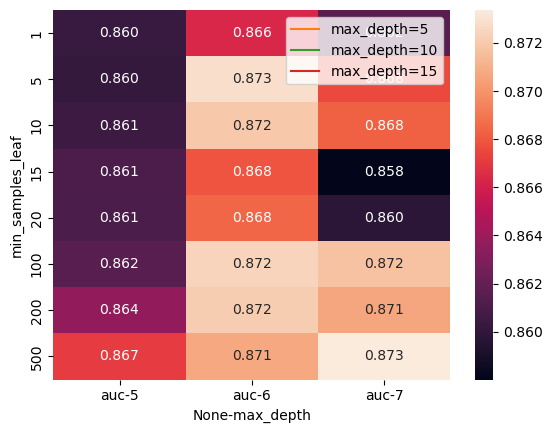

In [45]:

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()
plt.show()

Let's use max depth = 15

In [46]:
max_depth = 10

In [47]:

scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf_model = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf_model.fit(X_train, y_train)

        y_pred = rf_model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [48]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

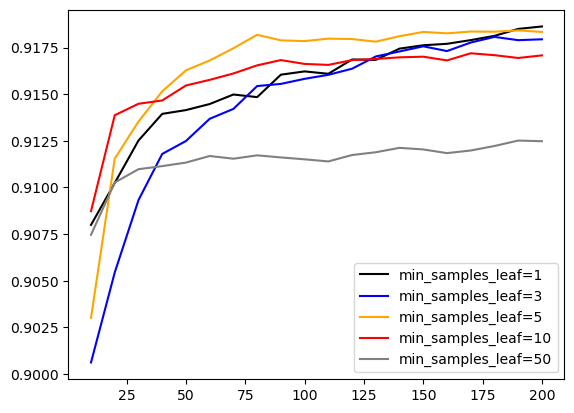

In [50]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)
    

plt.legend()
plt.show()

best min_samples_leaf 

In [51]:
min_samples_leaf = 5

In [52]:

rf = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

##### trainning with Boosting and XGBoost

In [53]:
import xgboost as xgb

In [54]:
#!pip install xgboost

In [55]:

features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

##### XGBoost Tunning 

In [56]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [57]:
y_pred = model.predict(dval)

In [58]:
roc_auc_score(y_val, y_pred)

0.9119314062867736

In [59]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [60]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [61]:
s = output.stdout

In [62]:

print(s[:200])

[0]	train-auc:0.89918	val-auc:0.87545
[5]	train-auc:0.94074	val-auc:0.90441
[10]	train-auc:0.95648	val-auc:0.91271
[15]	train-auc:0.96520	val-auc:0.91650
[20]	train-auc:0.97116	val-auc:0.92001
[25]	tr


In [63]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [64]:

df_score = parse_xgb_output(output)

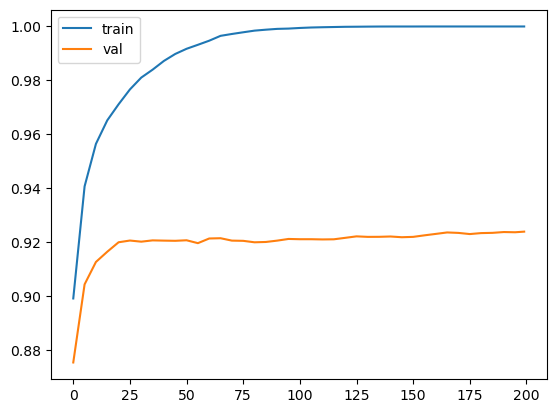

In [65]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

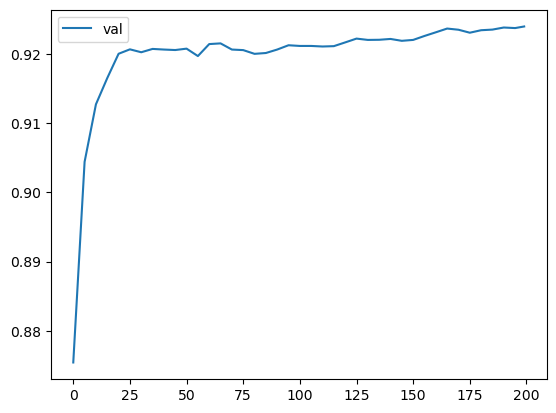

In [66]:

plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()
plt.show()

Tunning


eta
max_depth
min_child_weight

In [75]:
scores = {}

In [76]:

%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [77]:
scores = {}

In [78]:

key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [81]:

scores = {}

In [82]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [83]:

key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

In [84]:
del scores['max_depth=10']

C:\Users\narim\AppData\Local\Temp\ipykernel_18796\2504660028.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


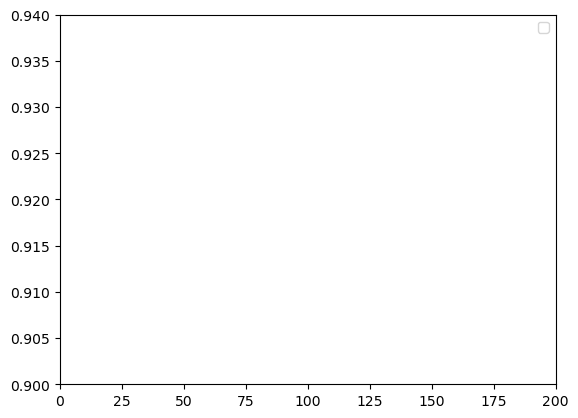

In [90]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)


plt.ylim(0.9, 0.94)
plt.xlim(0.0, 200)
plt.legend()
plt.show()


In [92]:
scores = {}

In [93]:


%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [94]:

key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

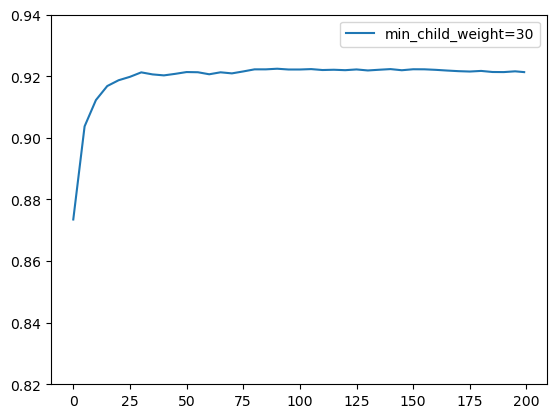

In [96]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.82, 0.94)
plt.legend()
plt.show()

In [97]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=40)

##### Selecting the final model

Choosing between xgboost, random forest and decision tree
Training the final model
Saving the model

Decision Tree

In [98]:

dt_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5)

In [99]:

y_pred = dt_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8724076820211331

Random Forest

In [100]:

rf_model = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=5,
                            random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       random_state=1)

In [101]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9183390754950971

Model XGboost

In [102]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=40)

In [103]:

y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9204425679298073

We will Train  the project with XGBOOST Modele that win

In [107]:
dicts_full_train = df_full_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [108]:
dicts_test = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(dicts_test)

In [110]:
dfulltrain = xgb.DMatrix(X_full_train, label=y_full_train,
                    feature_names=features)

dtest = xgb.DMatrix(x_test, label=y_test, feature_names=features)

In [111]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 10,
    'min_child_weight': 30,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=40)

In [112]:

y_pred = model.predict(dtest)

In [113]:

roc_auc_score(y_test, y_pred)

0.7326132136093074

##### Save the model

In [114]:
import pickle

In [115]:


# Saving the model with pickle
with open('model_xboost.bin', 'wb') as file:
    pickle.dump((dv,model), file)